<a href="https://colab.research.google.com/github/gingerthorp/deepLeaning/blob/master/project/Pro202007_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import files
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from sklearn.utils import Bunch

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving 1196178_leaningData.csv to 1196178_leaningData.csv
User uploaded file "1196178_leaningData.csv" with length 355598 bytes


In [38]:
df = pd.read_csv(io.StringIO(uploaded['1196178_leaningData.csv'].decode('euc-kr')))

In [39]:
df = df.replace("알수없음", np.nan)    # 알수없음 데이터 결측치로 변경.
df = df.dropna(axis=0)                    # 결측치 있는 행 제거.

In [40]:
target = (df['수익률'] > 0).astype(int).to_numpy()
data = df[list(df)[6:]].astype('float').to_numpy()
genfactor = Bunch(data=data,target=target)

In [42]:
print(genfactor.data.shape, genfactor.target.shape)

(2180, 18) (2180,)


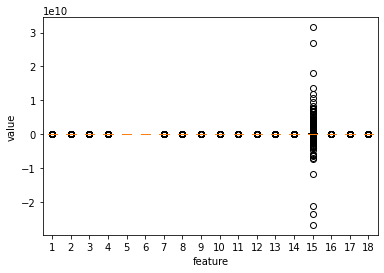

In [43]:
plt.boxplot(genfactor.data)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

In [44]:
np.unique(genfactor.target, return_counts=True)

(array([0, 1]), array([ 586, 1594]))

In [45]:
x = genfactor.data
y = genfactor.target

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

In [48]:
from sklearn.linear_model import SGDClassifier

In [49]:
sgd = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)

In [54]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.6559633027522935

In [51]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 직선 방정식을 계산합니다.
    return z

  def backprop(self, x, err):
    w_grad = x * err                  # 가중치에 대한 그레이디언트를 계산합니다.
    b_grad = 1 * err                  # 절편에 대한 그레이디언트를 계산합니다.
    return w_grad, b_grad
  
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=1000):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
    self.b = 0                        # 절편을 초기화합니다.
    for i in range(epochs):           # epochs만큼 반복합니다.
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:      # 모든 샘플에 대해 반복합니다.
        z = self.forpass(x[i])         # 정방향 계산
        a = self.activation(z)        # 활성화 함수 적용
        err = -(y[i] - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
        self.w -= w_grad              # 가중치 업데이트
        self.b -= b_grad              # 절편 업데이트
        # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))  # 에포크마다 평균 손실을 저장합니다.
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [52]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


0.6559633027522935

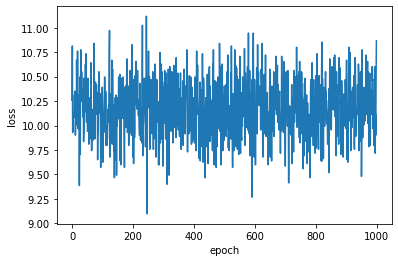

In [55]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [56]:
sgd.predict(x_train[:200])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1])

In [57]:
y_train[:200]

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1])